In [1]:
## 시계열 분석 거의 안된다.어려움  -> 주식예측 이런거 잘안된다. ㅈㄴ 어렵 박사도못함
## 페이스북 시계열 분석 써본다

# 통계기반 -> 딥러닝기바

In [27]:
import pandas as pd
import missingno as mino
import matplotlib.pyplot as plt
import matplotlib

In [7]:
data = pd.read_csv('C:\\Users\legen\\Desktop\\환의\\★데이터진흥원(고대)\\4주차 (데이터분석)\\0725(타임시리즈, 위치기반)\\zz.csv', engine='python', encoding='cp949') # delimiter = '\t' 둘이 똑같다

## excel 로 불러야함

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
날짜               250 non-null object
 미세먼지농도 (㎍/㎥)    250 non-null int64
결과               250 non-null object
dtypes: int64(1), object(2)
memory usage: 5.9+ KB


In [36]:
data['날짜']= pd.to_datetime(data['날짜'])  ## 판다스에서 dateutil 다 내부적으로 돌아서 문자열 -> 시간객체로 변화시켜줌

In [21]:
data  ## 날자 년-월-일 국제 표준

,날짜,미세먼지농도 (㎍/㎥),결과
0,2017-01-10,19,좋음
1,2017-01-11,20,좋음
2,2017-01-13,29,좋음
3,2017-01-14,40,보통
4,2017-01-20,20,좋음
5,2017-01-21,20,좋음
6,2017-01-27,25,좋음
7,2017-01-28,40,보통
8,2017-01-31,40,보통
9,2017-02-01,50,보통


In [17]:
type(temp) ##  타입이 datetime 인경우 시간날짜 간격에 따라서 합칠수가 있다. 리샘플
            ## 시리즈인경우 리심플 안됨 타입에 따라 리샘플 되고안되고

pandas.core.series.Series

In [52]:
data.set_index('날짜', inplace=True) ## 인덱스로 바꿔야 리샘플 쓸수 있따.

KeyError: '날짜'

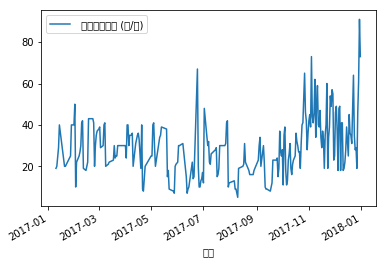

In [47]:
%matplotlib inline
data.plot.line()  ## re

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2017-01-10 to 2017-12-31
Data columns (total 2 columns):
 미세먼지농도 (㎍/㎥)    250 non-null int64
결과               250 non-null object
dtypes: int64(1), object(1)
memory usage: 15.9+ KB


In [55]:
data

,미세먼지농도 (㎍/㎥),결과
날짜,,
2017-01-10,19,좋음
2017-01-11,20,좋음
2017-01-13,29,좋음
2017-01-14,40,보통
2017-01-20,20,좋음
2017-01-21,20,좋음
2017-01-27,25,좋음
2017-01-28,40,보통
2017-01-31,40,보통


In [54]:
data['날짜'].resample('D')  

KeyError: '날짜'

In [49]:
data['2017-03':'2017-06']

,미세먼지농도 (㎍/㎥),결과
날짜,,
2017-03-01,38,보통
2017-03-02,39,보통
2017-03-03,29,좋음
2017-03-06,30,좋음
2017-03-07,40,보통
2017-03-08,41,보통
2017-03-09,20,좋음
2017-03-12,21,좋음
2017-03-13,22,좋음


In [40]:
#################################################################################3333
pd.date_range ## 시간 자동으로 만들어줌  range(1,10) 처럼

## series?
## series -> datetime index 어떻게
# resample?

<function pandas.core.indexes.datetimes.date_range>

In [41]:
index = pd.date_range('1/1/2000', periods=9, freq= 'T')  ## T 식ㄴ
series = pd.Series(range(9), index = index)

In [42]:
series ## datetimeindex 이므로 resample 쓸수있다

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

In [43]:
data["날짜"]

0     2017-01-10
1     2017-01-11
2     2017-01-13
3     2017-01-14
4     2017-01-20
5     2017-01-21
6     2017-01-27
7     2017-01-28
8     2017-01-31
9     2017-02-01
10    2017-02-02
11    2017-02-03
12    2017-02-06
13    2017-02-07
14    2017-02-08
15    2017-02-09
16    2017-02-10
17    2017-02-11
18    2017-02-14
19    2017-02-15
20    2017-02-16
21    2017-02-17
22    2017-02-22
23    2017-02-23
24    2017-02-24
25    2017-02-25
26    2017-02-26
27    2017-02-27
28    2017-03-01
29    2017-03-02
         ...    
220   2017-12-02
221   2017-12-03
222   2017-12-04
223   2017-12-05
224   2017-12-06
225   2017-12-07
226   2017-12-08
227   2017-12-09
228   2017-12-10
229   2017-12-11
230   2017-12-12
231   2017-12-13
232   2017-12-14
233   2017-12-15
234   2017-12-16
235   2017-12-17
236   2017-12-18
237   2017-12-19
238   2017-12-20
239   2017-12-21
240   2017-12-22
241   2017-12-23
242   2017-12-24
243   2017-12-25
244   2017-12-26
245   2017-12-27
246   2017-12-28
247   2017-12-

In [50]:
series.resample('3T').sum() ## 리샘플 다음에 집계함수, 그루핑과 ##데이트타임 인덱스

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [51]:
series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

In [ ]:
## 날짜,시간 타겟
#3 미세먼지 데이터로 미럐예측은 할수있다 성능은 씹 구데기 => 의미가 없다. 시계열 분석 아주 구데기
## 미세농도는 다른환경 영향 받음 => 외부 영향을 너무 많이 받아서 
## 통계적분석까지만한다는 ok but 예측분석은 out
## 정말 시간이 상관이 있나?? 어떤요소 나온결과가 날짜와 관련있을뿐 실제 시간하고 상관 x 시간에 따라 변하고 이런게 x


# 썜이 도와주면 분석은 하루만에 끝난다. 데이터 잘못수집하면 의미가없다.
# 컬럼 많으면많을수록 다양한 데이터 , 한가지 데이터만 수집 x
# 다양한 종류 데이터 => merge로 합침
# 공공데이터, 크롤링, openapi 다합쳐서 붙여 => 메쉬업(컨텐츠 리믹스) 

## 분석 잘된거는 비공개, 분석 공개된거는 잘못된거, 정부과제 엉터리

## 우리는 웹, 지도에있는거다 긁어올수있따 


# 통계분석 쉬움 예측분석 어려움


In [58]:
## 왜 datetime 기반을 넘파이로 안했을까?
## data util 편리한 유틸 이게 넘파이 기반으로 안만들어짐

In [59]:
############

In [60]:
# 페이스북에서 파이토치, 프로펫 현재 나온 시계열 알고리즘중 가장 좋음 + 쓰기 쉽다(R, PYTHON (pandas)지원)
# fbprophet 파이썬 기반 시계열 분석 => 예측분석하는애(싸이킷하고 똑같이 사용 가능)


In [61]:
!pip install fbprophet

  Complete output from command c:\users\legen\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\pip-install-snbjprxm\\fbprophet\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-wheel-twpl7fqj --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-install-snbjprxm\fbprophet\setup.py", line 120, in <module>
      """
    File "c:\users\legen\anaconda3\lib\site-packages\setuptools\__init__.py", line 129, in setup
      return distutils.core.setup(**attrs)
    File "c:\users\legen\anaconda3\lib\distutils\

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))': /simple/pandas/
  Failed building wheel for fbprophet
Could not install packages due to an EnvironmentError: [WinError 5] 액세스가 거부되었습니다: 'c:\\users\\legen\\anaconda3\\lib\\site-packages\\~andas\\io\\msgpack\\_packer.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You are using pip version 19.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [62]:
from fbprophet import Prophet


ModuleNotFoundError: No module named 'fbprophet'